<a href="https://colab.research.google.com/github/LuisRobles18/NLP/blob/main/Homework_4_Luis_Alberto_Robles_Hernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 4**
**Student ID:** 002581393 **Name:** Luis Alberto Robles Hernandez

**Github repository:** https://github.com/LuisRobles18/NLP/blob/main/Homework_4_Luis_Alberto_Robles_Hernandez.ipynb

##**INSTRUCTIONS**

Questions **(130 total points)**

**NOTE:** You can only use Python’s built-in regular functions, scikit-learn/tensorflow/keras as your ML library for these exercises, NLTK as your NLP library. Any code using any other ML or NLP libraries will not be graded. Note: You can use pandas and/or numpy as these are NOT machine learning libraries.

###**REQUIREMENTS**

**NOTE: Please run this Colab Notebook using the GPU.**

Using the Sentiment140 dataset (http://help.sentiment140.com/for-students/). The homework was tested and designed using the Stanford link for the zip file. Write the following pieces of code (use a **random seed of 2361**). **NOTE: Please READ all the instructions for the Dataset**:

**Requirement for Exercise 4**

In [ ]:
# keras.datasets.imdb is broken in TensorFlow 1.13 and 1.14 due to numpy 1.16.3
!pip install numpy==1.16.2

**Obtaining the dataset**

In [1]:
from IPython.display import clear_output
import zipfile
import pandas as pd
import re

#Downloading the Sentiment140 dataset from the Stanford link
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip -O sentiment140.zip
clear_output()

#The data is a CSV with emoticons removed. Data file format has 6 fields:
#0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
#1 - the id of the tweet (2087)
#2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
#3 - the query (lyx). If there is no query, then this value is NO_QUERY.
#4 - the user that tweeted (robotickilldozr)
#5 - the text of the tweet (Lyx is cool)

#Obtaining the ZIP file
my_zip = zipfile.ZipFile('sentiment140.zip')
storage_path = '.'
#There will be a list with the document names which will be used when showing the matrix
documents_name = []
#Each txt file inside the ZIP file will be stored in a list
documents = []
for file in my_zip.namelist():
    #The ZIP file contains two files, we will use the largest one
    if my_zip.getinfo(file).filename.startswith('training'):
        my_zip.extract(file, storage_path)
        df_data = pd.read_csv(my_zip.getinfo(file).filename, encoding='latin-1',
                              names=['Polarity', 'Id', 'Date', 'Query', 'User', 'Text'])

**NOTE:** In order to optimize the memory usage, the **Id**, **Date**, **Query** and **User** columns will be deleted, since it is not needed for the following exercises.

In [2]:
df_data = df_data.drop(['Id','Date','Query','User'], axis = 1)

##**EXERCISE 1**

**1. (15 points)** Take the **positive** and the **negative** tweets only. Use Sklearn to split the dataset in 80% training, 20% testing splits. Provide a nicely formatted summary of these splits, containing their size) 

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import random

#Filtering out neutral rows (Polarity = 2)
df_data = df_data[~df_data['Polarity'].isin([2])]
df_data.reset_index(drop=True, inplace=True)

#Positive polarity will be considered as 1
df_data.loc[df_data.Polarity == 4, "Polarity"] = 1

#Setting random seed to 2361
random.seed(2361)
np.random.seed(2361)

list_data = list(df_data['Text'])
list_target = list(df_data['Polarity'])

training_data, test_data, training_target, test_target = train_test_split(
    list_data, list_target, test_size=0.20, random_state = 2361)

df_summary_split = pd.DataFrame(columns=['Split group','Percentage', 'Positive Tweets', 'Negative Tweets', 'Size (Tweets)'])
df_summary_split.loc[len(df_summary_split), :] = ['Training Data','80%', training_target.count(1), 
                                                  training_target.count(0), len(training_data)]
df_summary_split.loc[len(df_summary_split), :] = ['Testing Data','20%', test_target.count(1), 
                                                  test_target.count(0), len(test_data)]
df_summary_split.loc[len(df_summary_split), :] = ['All (Total)', '100%', test_target.count(1)+training_target.count(1), 
                                                  test_target.count(0)+training_target.count(0), len(list_data)]
df_summary_split['Size (Tweets)'] = df_summary_split['Size (Tweets)'].apply(lambda x: "{:,}".format(x))
df_summary_split['Positive Tweets'] = df_summary_split['Positive Tweets'].apply(lambda x: "{:,}".format(x))
df_summary_split['Negative Tweets'] = df_summary_split['Negative Tweets'].apply(lambda x: "{:,}".format(x))
df_summary_split

,Split group,Percentage,Positive Tweets,Negative Tweets,Size (Tweets)
0,Training Data,80%,"639,998","640,002","1,280,000"
1,Testing Data,20%,"160,002","159,998","320,000"
2,All (Total),100%,"800,000","800,000","1,600,000"


##**EXERCISE 2**

**2. (15 points)** Use the code from the previous classes to build the following models (15 points):

*   A) **SVM** using **TF-IDF**.
*   B) **Naive Bayes** using **TF-IDF**.
*   C) **Random Forest** using **TF-IDF**.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline

#================ MODEL A (SVM with TF IDF) ===================
print("Building SVM Model using TF-IDF...")
#Model = SVM (TF-IDF)
#% of Training = 80%
#% of Testing = 20%

#NOTE: According to the sklearn documentation, LinearSVC is
#similar to SVC with parameter kernel='linear', and it has
#more flexibility in loss functions and should scale better
#to large number of samples.
model_a = make_pipeline(TfidfVectorizer(), LinearSVC())
model_a.fit(training_data, training_target)

#================ MODEL B (NB with TF IDF) ===================
print("Building Multinomial NB Model using TF-IDF...")
#Model = Multinomial NB (TF-IDF)
#% of Training = 80%
#% of Testing = 20%
model_b = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_b.fit(training_data, training_target)

#=========== MODEL C (Random Forest with TF IDF) ==============
print("Building Random Forest Model using TF-IDF...")
#Model = Random Forest (TF-IDF)
#% of Training = 80%
#% of Testing = 20%

#NOTE: According to the sklearn documentation, n_jobs=-1
#means that it will use all the processors available, and
#should run faster. Also, since this process takes too long
#for a very large sample, an additional solution is by
#specifying the max_depth parameter.
#With a max_depth of 50, the process takes around 5 minutes
model_c = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_jobs=-1, max_depth=50))
model_c.fit(training_data, training_target)

print("Done!")

Building SVM Model using TF-IDF...
Building Multinomial NB Model using TF-IDF...
Building Random Forest Model using TF-IDF...
Done!


##**EXERCISE 3**

**3. (40 points)** Use the code from the LSTM class to build a classifier for negative and positive sentiment tweets. Train the model with the training data split. Once the model is built, test it with the testing data split. Display the classifier report for this evaluation.

###**Data insight and pre-processing**

In [25]:
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
from keras.preprocessing.text import Tokenizer

# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

# Concatonate test and training datasets
alltweets = np.concatenate((training_data, test_data), axis=0)

# Tweet lengths across test and training whole datasets
print("Maximum tweet length: {}".format(len(max((alltweets), key=len))))
print("Minimum tweet length: {}".format(len(min((alltweets), key=len))))
result = [len(x) for x in alltweets]
print("Mean tweet length: {}".format(np.mean(result)))

# The length of tweets
tweet_length = 150

tokenizer = Tokenizer(num_words=tweet_length, lower=True)
tokenizer.fit_on_texts(np.array(df_data['Text']))
x_train = tokenizer.texts_to_sequences(np.array(training_data))
x_train = sequence.pad_sequences(x_train, maxlen=tweet_length)

x_test = tokenizer.texts_to_sequences(np.array(test_data))
x_test = sequence.pad_sequences(x_test, maxlen=tweet_length)

y_train = np.array(training_target)
y_test = np.array(test_target)

print("")
print("Shape Training Tweet Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Tweet Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

Maximum tweet length: 374
Minimum tweet length: 6
Mean tweet length: 74.09011125

Shape Training Tweet Data: (1280000, 150)
Shape Training Class Data: (1280000,)
Shape Test Tweet Data: (320000, 150)
Shape Test Class Data: (320000,)


###**Creating and building LSTM Recurrent Neural Network**

In [26]:
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = 10000, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = tweet_length # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.10 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM which is optimised for GPUs. This layer 
# looks at the sequence of words in the tweet, along with their word embeddings
# and uses both of these to determine to sentiment of a given tweet.
model.add(
    tf.keras.layers.LSTM(
        units=128 # 128 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.10 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative tweet. Closer to 1 
# indicates a positive tweet.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 32)           320000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 150, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 402,561
Trainable params: 402,561
Non-trainable params: 0
_________________________________________________________________


###**Visualizing the Model**

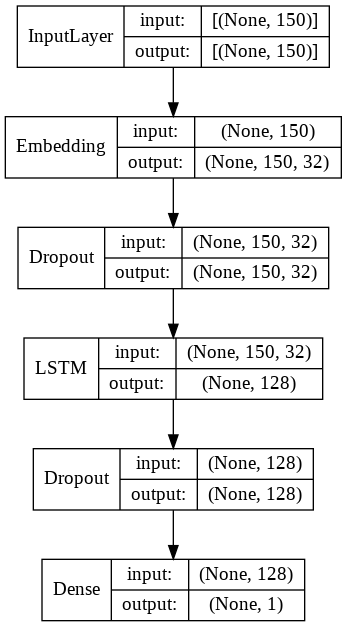

In [27]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

###**Training the LSTM**

In [28]:
# Train the LSTM on the training data
history = model.fit(x_train, y_train, batch_size=512, epochs=5,validation_split=0.15,verbose=1) 

Epoch 1/5
2125/2125 [==============================] - 46s 21ms/step - loss: 0.5904 - accuracy: 0.6802 - val_loss: 0.5619 - val_accuracy: 0.7036
Epoch 2/5
2125/2125 [==============================] - 44s 21ms/step - loss: 0.5624 - accuracy: 0.7047 - val_loss: 0.5575 - val_accuracy: 0.7072
Epoch 3/5
2125/2125 [==============================] - 44s 21ms/step - loss: 0.5574 - accuracy: 0.7082 - val_loss: 0.5525 - val_accuracy: 0.7109
Epoch 4/5
2125/2125 [==============================] - 44s 21ms/step - loss: 0.5525 - accuracy: 0.7116 - val_loss: 0.5483 - val_accuracy: 0.7148
Epoch 5/5
2125/2125 [==============================] - 44s 21ms/step - loss: 0.5494 - accuracy: 0.7144 - val_loss: 0.5450 - val_accuracy: 0.7171


###**Evaluating the model with the testing data split and showing the Classifier Report**

In [29]:
import warnings
warnings.filterwarnings("ignore")

# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=["Negative","Positive"]))

              precision    recall  f1-score   support

    Negative       0.72      0.71      0.71    159998
    Positive       0.71      0.73      0.72    160002

    accuracy                           0.72    320000
   macro avg       0.72      0.72      0.72    320000
weighted avg       0.72      0.72      0.72    320000



###**Answer the following question**

**What can you say about the performance of this model?** After looking at the performance results from this model, I can say the model didn't do a good job. Using the default parameters used from Class 19, I was getting around 60% of accuracy, but incrementing the LSTM units fort the layer to 128 and the batch size to 512, I was able to increase the accuracy to around 70%, which I think is still not good.

Since we have large amount of data to train, around 1.6M tweets, I think the amount of data is not the problem but the quality of the data. We know that the dataset training already has emoticons removed, but this is not enough since we have more things I think it should be removed in order to reduce noise when training, such as URL's, user mentions, and hashtags for example.

##**EXERCISE 4**

**4. (30 points)** Compare all models together in terms of Precision, Recall and F1 score. Put all of these numbers in a nicely formatted dataframe.

###**Calculating and displaying metrics from each model**

In [30]:
import sklearn

df_metrics = pd.DataFrame(columns=['Model Name','Precision','Recall','Macro F1-Score'])


print("Evaluating and getting metrics from SVM TF-IDF...")
#=========== SVM TF-IDF (METRICS) ==============
model_a_labels = model_a.predict(test_data)
model_a_precision = sklearn.metrics.precision_score(test_target,model_a_labels)
model_a_recall = sklearn.metrics.recall_score(test_target,model_a_labels)
model_a_f1 = sklearn.metrics.f1_score(model_a_labels, test_target, average='macro')

model_a_metrics = ['Support Vector Machine (TF-IDF)',model_a_precision,model_a_recall,model_a_f1]

print("Evaluating and getting metrics from NB TF-IDF...")
#=========== Naive Bayes TF-IDF (METRICS) ==============
model_b_labels = model_b.predict(test_data)
model_b_precision = sklearn.metrics.precision_score(test_target,model_b_labels)
model_b_recall = sklearn.metrics.recall_score(test_target,model_b_labels)
model_b_f1 = sklearn.metrics.f1_score(model_b_labels, test_target, average='macro')

model_b_metrics = ['Multinomial NB (TF-IDF)',model_b_precision,model_b_recall,model_b_f1]

print("Evaluating and getting metrics from Random Forest TF-IDF...")
#=========== Naive Bayes TF-IDF (METRICS) ==============
model_c_labels = model_c.predict(test_data)
model_c_precision = sklearn.metrics.precision_score(test_target,model_c_labels)
model_c_recall = sklearn.metrics.recall_score(test_target,model_c_labels)
model_c_f1 = sklearn.metrics.f1_score(model_c_labels, test_target, average='macro')

model_c_metrics = ['Random Forest (TF-IDF)',model_c_precision,model_c_recall,model_c_f1]

print("Evaluating and getting metrics from LSTM...")
#=========== LSTM (METRICS) ==============
model_lstm_precision = sklearn.metrics.precision_score(y_test,predicted_classes)
model_lstm_recall = sklearn.metrics.recall_score(y_test,predicted_classes)
model_lstm_f1 = sklearn.metrics.f1_score(predicted_classes, y_test, average='macro')

model_lstm_metrics = ['LSTM Model',model_lstm_precision,model_lstm_recall,model_lstm_f1]

print("Done!")

df_metrics.loc[len(df_metrics), :] = model_a_metrics
df_metrics.loc[len(df_metrics), :] = model_b_metrics
df_metrics.loc[len(df_metrics), :] = model_c_metrics
df_metrics.loc[len(df_metrics), :] = model_lstm_metrics

df_metrics

Evaluating and getting metrics from SVM TF-IDF...
Evaluating and getting metrics from NB TF-IDF...
Evaluating and getting metrics from Random Forest TF-IDF...
Evaluating and getting metrics from LSTM...
Done!


,Model Name,Precision,Recall,Macro F1-Score
0,Support Vector Machine (TF-IDF),0.793895,0.800609,0.796374
1,Multinomial NB (TF-IDF),0.800344,0.728078,0.772759
2,Random Forest (TF-IDF),0.756795,0.764822,0.759509
3,LSTM Model,0.712602,0.730622,0.71793


###**Answer the following questions**

**Which model performs the best?** SVM was the model which perfomed the best.

**Why do you think this is?** SVM had a higher recall and F1 score but a little lower precision compared to Multinomial NB. However, in terms of performance/computational cost, I think Multinomial NB is the the best one because of it's computational cost (it just took a very few seconds for training while SVM took several minutes) and the difference between the SVM model is not considerable. In other words, in terms of performance/computational cost, and considering that sklearn models are not compatible to run using the GPU, MultinomialNB did the best job, but in terms of performance, SVM performed the best.

The reason why SVM performed the best (but with a higher computational cost), is because it scales very well in high dimensional data, thus we get better performance results compared to other models.

**What do you think you can do to improve performance?** Since we have enough data to train, I think we can improve the performance by pre-processing the datasets, in which we could:

*   Delete URL's
*   Delete user mentions
*   Delete hashtags

Probably filtering out those elements could reduce some noise when training these models, and thus, getting a better performance.





##**EXERCISE 5**

**5. (30 points)** Add to the comparison of #4 a the manually calculated precision, recall and F1 score using VADER and their suggested defaults to categorize the test split tweets in positive or negative.

###**Performing VADER Sentiment analysis on the test split data**

In [31]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import numpy as np
import pandas as pd

clear_output()
sia = SIA()

#Calculating the sentiment score from the sentiment140 dataset

total = len(test_data)
current_percentage = 0
last_percentage = 0

df_polarity = pd.DataFrame(columns=['Text','Compound','Negative','Neutral','Positive'])
for i in range(len(test_data)):
    scores = sia.polarity_scores(test_data[i])
    df_polarity.loc[len(df_polarity), :] = [test_data[i],scores['compound'],scores['neg'],scores['neu'],scores['pos']]
    
    current_percentage = (i/total)*100
    if current_percentage - last_percentage > 0.1:
        print("Progress: "+str(round(current_percentage,1))+"%")
        last_percentage = current_percentage

clear_output()

df_polarity

,Text,Compound,Negative,Neutral,Positive
0,is going to bed now after a day of hard work -...,0.2732,0.067,0.813,0.12
1,@lilxicanita aww mecheee you can be my friend....,0,0,1,0
2,having my big brother open for me is a dream c...,0.5905,0,0.779,0.221
3,acting going well. will reach goal by God's gr...,0.6124,0,0.5,0.5
4,@morganmovement what?! Wtf happened?! I'm doin...,-0.695,0.24,0.76,0
...,...,...,...,...,...
319995,@mileycyrus http://twitpic.com/5ppwd - I have ...,0,0,1,0
319996,"@gin_lady thanks, lots of sleep and knitting s...",0.6808,0,0.556,0.444
319997,just watched like a three hour movie arizona i...,0.3612,0,0.839,0.161
319998,I saw all the 'tussen de oren' episodes and f...,-0.7316,0.255,0.745,0


In [32]:
#We add an empty column named "Label"
df_polarity['Label'] = np.nan

#If compound is 0 or greater will be cosidered as positive
#Otherwise it will be considered as negative
for index, row in df_polarity.iterrows():
    if row['Compound'] >= 0:
        df_polarity.at[index,'Label'] = 1
    else:
        df_polarity.at[index,'Label'] = 0

df_polarity.Label = df_polarity.Label.astype(int)
df_polarity

,Text,Compound,Negative,Neutral,Positive,Label
0,is going to bed now after a day of hard work -...,0.2732,0.067,0.813,0.12,1
1,@lilxicanita aww mecheee you can be my friend....,0,0,1,0,1
2,having my big brother open for me is a dream c...,0.5905,0,0.779,0.221,1
3,acting going well. will reach goal by God's gr...,0.6124,0,0.5,0.5,1
4,@morganmovement what?! Wtf happened?! I'm doin...,-0.695,0.24,0.76,0,0
...,...,...,...,...,...,...
319995,@mileycyrus http://twitpic.com/5ppwd - I have ...,0,0,1,0,1
319996,"@gin_lady thanks, lots of sleep and knitting s...",0.6808,0,0.556,0.444,1
319997,just watched like a three hour movie arizona i...,0.3612,0,0.839,0.161,1
319998,I saw all the 'tussen de oren' episodes and f...,-0.7316,0.255,0.745,0,0


In [33]:
print("Evaluating and getting metrics from VADER...")
#=========== VADER (METRICS) ==============
model_vader_precision = sklearn.metrics.precision_score(np.array(test_target),df_polarity.Label.values)
model_vader_recall = sklearn.metrics.recall_score(np.array(test_target),df_polarity.Label.values)
model_vader_f1 = sklearn.metrics.f1_score(df_polarity.Label.values, np.array(test_target), average='macro')

model_vader_metrics = ['VADER Analysis',model_vader_precision,model_vader_recall,model_vader_f1]

print("Done!")

df_metrics.loc[len(df_metrics), :] = model_vader_metrics

df_metrics

Evaluating and getting metrics from VADER...
Done!


,Model Name,Precision,Recall,Macro F1-Score
0,Support Vector Machine (TF-IDF),0.793895,0.800609,0.796374
1,Multinomial NB (TF-IDF),0.800344,0.728078,0.772759
2,Random Forest (TF-IDF),0.756795,0.764822,0.759509
3,LSTM Model,0.712602,0.730622,0.71793
4,VADER Analysis,0.609215,0.897545,0.640782


###**Answer the following questions**

**Is this approach as good as the previous ones? Why do you think this is?** Actually, VADER sentiment analysis did the worst job from all the models. First of all, is the one which took longer for the analysis (a couple of hours). Also, if we research more about VADER sentiment analysis, mispellings may cause to have inaccurate results, and as we know, Twitter is a social media platform in which generally we could find tweets with mispelled words, or even words in other languages. Also, VADER can't detect sarcarsm, so it can be misinterpreted.

To summarize, VADER should be good to use if the dataset has no mispellings, sarcasm, or other noise that could make the analyzer to perform bad (like user mentions, URL's, or hashtags in this case).

##**BONUS EXERCISE**

**(30 points)** : Try the following things to improve the LSTM model:

*   Use **90%** training data, **10%** testing
*   Remove stopwords from the tweets.
*   Remove all user mentions for the tweets (@something)

Compare all three new models in terms of their precision, recall and F1 score. 

###**Removing stopwords and user mentions**

In [34]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
clear_output()

stop_words = set(stopwords.words('english')) 

list_data_numpy = np.array(list_data)
total = len(list_data_numpy)
list_filtered_data = []
last_percentage = 0
current_percentage = 0

#Iterating over the tweet text list data
for i in range(total):
    #Removing stop-words
    word_tokens = word_tokenize(list_data_numpy[i])
    filtered_sentence = [w.lower() for w in word_tokens if not w in stop_words] 
    tweet_without_stop_words = ' '.join(filtered_sentence)

    #Removing user mentions
    tweets_without_user_mentions = re.sub("[\s.]*@[A-Za-z0-9_]+\s+"," ",tweet_without_stop_words)

    #Remover RT@User and Leading Usernames
    if tweets_without_user_mentions.startswith("@"):
        tweets_without_user_mentions = tweets_without_user_mentions[1:]
    
    if (tweets_without_user_mentions.lower()).startswith("rt @"):
        tweets_without_user_mentions = tweets_without_user_mentions[1:]

    #Adding the results to a new list
    list_filtered_data.append(tweets_without_user_mentions)

    current_percentage = (i/total)*100
    if current_percentage - last_percentage > 0.1:
        print("Progress: "+str(round(current_percentage,1))+"%")
        last_percentage = current_percentage

clear_output()

print("Done!")

Done!


###**Splitting data to 90% for training and 10% for testing**

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
import random

#Setting random seed to 2361
random.seed(2361)
np.random.seed(2361)

list_data = list_filtered_data
list_target = list(df_data['Polarity'])

training_data, test_data, training_target, test_target = train_test_split(
    list_data, list_target, test_size=0.10, random_state = 2361)

df_summary_split = pd.DataFrame(columns=['Split group','Percentage', 'Positive Tweets', 'Negative Tweets', 'Size (Tweets)'])
df_summary_split.loc[len(df_summary_split), :] = ['Training Data','90%', training_target.count(1), 
                                                  training_target.count(0), len(training_data)]
df_summary_split.loc[len(df_summary_split), :] = ['Testing Data','10%', test_target.count(1), 
                                                  test_target.count(0), len(test_data)]
df_summary_split.loc[len(df_summary_split), :] = ['All (Total)', '100%', test_target.count(1)+training_target.count(1), 
                                                  test_target.count(0)+training_target.count(0), len(list_data)]
df_summary_split['Size (Tweets)'] = df_summary_split['Size (Tweets)'].apply(lambda x: "{:,}".format(x))
df_summary_split['Positive Tweets'] = df_summary_split['Positive Tweets'].apply(lambda x: "{:,}".format(x))
df_summary_split['Negative Tweets'] = df_summary_split['Negative Tweets'].apply(lambda x: "{:,}".format(x))
df_summary_split

,Split group,Percentage,Positive Tweets,Negative Tweets,Size (Tweets)
0,Training Data,90%,"720,144","719,856","1,440,000"
1,Testing Data,10%,"79,856","80,144","160,000"
2,All (Total),100%,"800,000","800,000","1,600,000"


###**Re-training models from Exercise 2**

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline

#================ MODEL A (SVM with TF IDF) ===================
print("Building SVM Model using TF-IDF...")
#Model = SVM (TF-IDF)
#% of Training = 90%
#% of Testing = 10%
model_a = make_pipeline(TfidfVectorizer(), LinearSVC())
model_a.fit(training_data, training_target)

#================ MODEL B (NB with TF IDF) ===================
print("Building Multinomial NB Model using TF-IDF...")
#Model = Multinomial NB (TF-IDF)
#% of Training = 90%
#% of Testing = 10%
model_b = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_b.fit(training_data, training_target)

#=========== MODEL C (Random Forest with TF IDF) ==============
print("Building Random Forest Model using TF-IDF...")
#Model = Random Forest (TF-IDF)
#% of Training = 90%
#% of Testing = 10%
model_c = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_jobs=-1, max_depth=50))
model_c.fit(training_data, training_target)

print("Done!")

Building SVM Model using TF-IDF...
Building Multinomial NB Model using TF-IDF...
Building Random Forest Model using TF-IDF...
Done!


###**Re-training LSTM Model from Exercise 3**

In [38]:
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
from keras.preprocessing.text import Tokenizer

# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

# Concatonate test and training datasets
alltweets = np.concatenate((training_data, test_data), axis=0)

# Tweet lengths across test and training whole datasets
print("Maximum tweet length: {}".format(len(max((alltweets), key=len))))
print("Minimum tweet length: {}".format(len(min((alltweets), key=len))))
result = [len(x) for x in alltweets]
print("Mean tweet length: {}".format(np.mean(result)))

# The length of tweets
tweet_length = 100

tokenizer = Tokenizer(num_words=tweet_length, lower=True)
tokenizer.fit_on_texts(np.array(df_data['Text']))
x_train = tokenizer.texts_to_sequences(np.array(training_data))
x_train = sequence.pad_sequences(x_train, maxlen=tweet_length)

x_test = tokenizer.texts_to_sequences(np.array(test_data))
x_test = sequence.pad_sequences(x_test, maxlen=tweet_length)

y_train = np.array(training_target)
y_test = np.array(test_target)

print("")
print("Shape Training Tweet Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Tweet Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

Maximum tweet length: 580
Minimum tweet length: 0
Mean tweet length: 58.2052325

Shape Training Tweet Data: (1440000, 100)
Shape Training Class Data: (1440000,)
Shape Test Tweet Data: (160000, 100)
Shape Test Class Data: (160000,)


In [39]:
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = 10000, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = tweet_length # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.10 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM which is optimised for GPUs. This layer 
# looks at the sequence of words in the tweet, along with their word embeddings
# and uses both of these to determine to sentiment of a given tweet.
model.add(
    tf.keras.layers.LSTM(
        units=128 # 128 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.10 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative tweet. Closer to 1 
# indicates a positive tweet.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 402,561
Trainable params: 402,561
Non-trainable params: 0
_________________________________________________________________


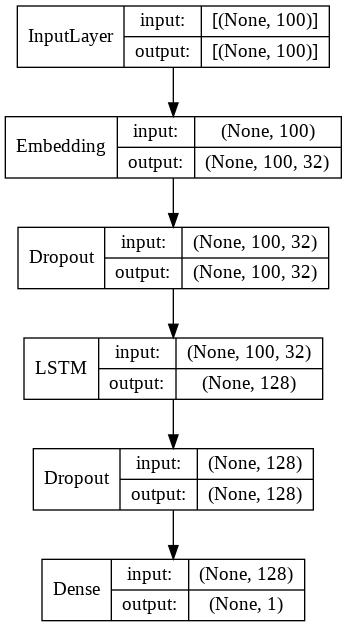

In [40]:
tf.keras.utils.plot_model(model, to_file='model_bonus.png', show_shapes=True, show_layer_names=False)

In [41]:
# Train the LSTM on the training data
history = model.fit(x_train, y_train, batch_size=512, epochs=5,validation_split=0.15,verbose=1) 

Epoch 1/5
2391/2391 [==============================] - 40s 16ms/step - loss: 0.6504 - accuracy: 0.6061 - val_loss: 0.6413 - val_accuracy: 0.6183
Epoch 2/5
2391/2391 [==============================] - 38s 16ms/step - loss: 0.6414 - accuracy: 0.6168 - val_loss: 0.6399 - val_accuracy: 0.6190
Epoch 3/5
2391/2391 [==============================] - 39s 16ms/step - loss: 0.6411 - accuracy: 0.6161 - val_loss: 0.6394 - val_accuracy: 0.6191
Epoch 4/5
2391/2391 [==============================] - 39s 16ms/step - loss: 0.6406 - accuracy: 0.6180 - val_loss: 0.6396 - val_accuracy: 0.6200
Epoch 5/5
2391/2391 [==============================] - 38s 16ms/step - loss: 0.6403 - accuracy: 0.6180 - val_loss: 0.6387 - val_accuracy: 0.6202


In [42]:
import warnings
warnings.filterwarnings("ignore")

# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=["Negative","Positive"]))

              precision    recall  f1-score   support

    Negative       0.63      0.58      0.61     80144
    Positive       0.61      0.66      0.64     79856

    accuracy                           0.62    160000
   macro avg       0.62      0.62      0.62    160000
weighted avg       0.62      0.62      0.62    160000



###**VADER Sentiment Analysis (Exercise 5)**

In [43]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import numpy as np
import pandas as pd

clear_output()
sia = SIA()

#Calculating the sentiment score from the sentiment140 dataset

total = len(test_data)
last_percentage = 0
current_percentage = 0

df_polarity = pd.DataFrame(columns=['Text','Compound','Negative','Neutral','Positive'])
for i in range(len(test_data)):
    scores = sia.polarity_scores(test_data[i])
    df_polarity.loc[len(df_polarity), :] = [test_data[i],scores['compound'],scores['neg'],scores['neu'],scores['pos']]
    
    current_percentage = (i/total)*100
    if current_percentage - last_percentage > 0.1:
        print("Progress: "+str(round(current_percentage,1))+"%")
        last_percentage = current_percentage

clear_output()

df_polarity['Label'] = np.nan

#If compound is 0 or greater will be cosidered as positive
#Otherwise it will be considered as negative
for index, row in df_polarity.iterrows():
    if row['Compound'] >= 0:
        df_polarity.at[index,'Label'] = 1
    else:
        df_polarity.at[index,'Label'] = 0

df_polarity.Label = df_polarity.Label.astype(int)

###**Comparing the performance between the re-trained models**

In [44]:
import sklearn

df_metrics = pd.DataFrame(columns=['Model Name','Precision','Recall','Macro F1-Score'])


print("Evaluating and getting metrics from SVM TF-IDF...")
#=========== SVM TF-IDF (METRICS) ==============
model_a_labels = model_a.predict(test_data)
model_a_precision = sklearn.metrics.precision_score(test_target,model_a_labels)
model_a_recall = sklearn.metrics.recall_score(test_target,model_a_labels)
model_a_f1 = sklearn.metrics.f1_score(model_a_labels, test_target, average='macro')

model_a_metrics = ['Support Vector Machine (TF-IDF)',model_a_precision,model_a_recall,model_a_f1]

print("Evaluating and getting metrics from NB TF-IDF...")
#=========== Naive Bayes TF-IDF (METRICS) ==============
model_b_labels = model_b.predict(test_data)
model_b_precision = sklearn.metrics.precision_score(test_target,model_b_labels)
model_b_recall = sklearn.metrics.recall_score(test_target,model_b_labels)
model_b_f1 = sklearn.metrics.f1_score(model_b_labels, test_target, average='macro')

model_b_metrics = ['Multinomial NB (TF-IDF)',model_b_precision,model_b_recall,model_b_f1]

print("Evaluating and getting metrics from Random Forest TF-IDF...")
#=========== Naive Bayes TF-IDF (METRICS) ==============
model_c_labels = model_c.predict(test_data)
model_c_precision = sklearn.metrics.precision_score(test_target,model_c_labels)
model_c_recall = sklearn.metrics.recall_score(test_target,model_c_labels)
model_c_f1 = sklearn.metrics.f1_score(model_c_labels, test_target, average='macro')

model_c_metrics = ['Random Forest (TF-IDF)',model_c_precision,model_c_recall,model_c_f1]

print("Evaluating and getting metrics from LSTM...")
#=========== LSTM (METRICS) ==============
model_lstm_precision = sklearn.metrics.precision_score(y_test,predicted_classes)
model_lstm_recall = sklearn.metrics.recall_score(y_test,predicted_classes)
model_lstm_f1 = sklearn.metrics.f1_score(predicted_classes, y_test, average='macro')

model_lstm_metrics = ['LSTM Model',model_lstm_precision,model_lstm_recall,model_lstm_f1]

print("Evaluating and getting metrics from VADER...")
#=========== VADER (METRICS) ==============
model_vader_precision = sklearn.metrics.precision_score(np.array(test_target),df_polarity.Label.values)
model_vader_recall = sklearn.metrics.recall_score(np.array(test_target),df_polarity.Label.values)
model_vader_f1 = sklearn.metrics.f1_score(df_polarity.Label.values, np.array(test_target), average='macro')

model_vader_metrics = ['VADER Analysis',model_vader_precision,model_vader_recall,model_vader_f1]

print("Done!")

df_metrics.loc[len(df_metrics), :] = model_a_metrics
df_metrics.loc[len(df_metrics), :] = model_b_metrics
df_metrics.loc[len(df_metrics), :] = model_c_metrics
df_metrics.loc[len(df_metrics), :] = model_lstm_metrics
df_metrics.loc[len(df_metrics), :] = model_vader_metrics

df_metrics

Evaluating and getting metrics from SVM TF-IDF...
Evaluating and getting metrics from NB TF-IDF...
Evaluating and getting metrics from Random Forest TF-IDF...
Evaluating and getting metrics from LSTM...
Evaluating and getting metrics from VADER...
Done!


,Model Name,Precision,Recall,Macro F1-Score
0,Support Vector Machine (TF-IDF),0.776107,0.792552,0.782333
1,Multinomial NB (TF-IDF),0.783155,0.737415,0.766814
2,Random Forest (TF-IDF),0.738008,0.773367,0.74974
3,LSTM Model,0.611931,0.660138,0.620898
4,VADER Analysis,0.598454,0.901848,0.625355


###**Answer the following questions**

**Did this change the results in any way? Why do you think so?**
Yes, the results changed in all the models. In all cases we see that the performance in every model is a little worse compared to the previous trained models.

I think removing user mentions and increasing the training size "helped" to improve the performance, but deleting stop words was not very helpful at all, so we got a little lower performance overall.

The reason why I think removing stop words was a bad idea is because a sentiment dataset may be **sensitive** if deleting the stop words. Let's say for example we have a following tweet:

**"This food was not great at all"**

If removing stopwords, we should have the following:

**"food great"**

As you can see, the models could interpret the first one as a negative tweet (because of the "not" word), while after removing the stop words, the models could interpret it as a positive tweet (because of the word "great"). That's why it is important that we should not remove stop words if we are training a sentiment dataset, because removing them could be **misinterpreted** by the models.